In [88]:
#Descargo paquetes a usar
install.packages("corrplot")
install.packages("Hmisc")
install.packages("dplyr")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("caret")
install.packages("e1017")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘e1017’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [89]:
#Instalo librerías a usar
library(caret)
library(data.table)
library(class)
library(e1071)


In [90]:
#Descargo la base de datos "datos"
datos <- read.csv("datos.csv" ,header=TRUE,sep=',')

In [91]:
#Descargo la base de datos "resultados"
resultados <- read.csv("resultados.csv" ,header=TRUE,sep=',')

In [92]:
#Trabajo los missings
mean(is.na(datos$averageRating))
mean(is.na(datos$numVotes))
mean(is.na(datos$titleType))
mean(is.na(datos$isAdult))
mean(is.na(datos$startYear))
mean(is.na(datos$endYear))
mean(is.na(datos$runtimeMinutes))
mean(is.na(datos$genres_x))
mean(is.na(datos$directors))
mean(is.na(datos$writers))
mean(is.na(datos$seasonNumber))
mean(is.na(datos$episodeNumber))
mean(is.na(datos$ordering))
mean(is.na(datos$language))
mean(is.na(datos$types))
mean(is.na(datos$attributes))
mean(is.na(datos$isOriginalTitle))
mean(is.na(datos$adult))
mean(is.na(datos$budget))
mean(is.na(datos$genres_y))
mean(is.na(datos$original_language))
mean(is.na(datos$overview))
mean(is.na(datos$popularity))
mean(is.na(datos$production_companies))
mean(is.na(datos$production_countries))
mean(is.na(datos$release_date))
mean(is.na(datos$revenue))
mean(is.na(datos$runtime))
mean(is.na(datos$status))
mean(is.na(datos$tagline))
mean(is.na(datos$video))

[1] 0

[1] 0

[1] 0

[1] 2.222222e-06

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0.6207867

[1] 0

[1] 0

[1] 0

[1] 0.6207867

[1] 0

[1] 0.95148

[1] 0

[1] 0

[1] 0

[1] 0.9514833

[1] 0

[1] 0

[1] 0

[1] 0.9514833

[1] 0.9516911

[1] 0

[1] 0

[1] 0

In [93]:
#Cuento cantidad de missings 
colSums(is.na(datos))

averageRating             numVotes            titleType 
                   0                    0                    0 
             isAdult            startYear              endYear 
                   2                    0                    0 
      runtimeMinutes             genres_x            directors 
                   0                    0                    0 
             writers         seasonNumber        episodeNumber 
                   0                    0                    0 
            ordering             language                types 
              558708                    0                    0 
          attributes      isOriginalTitle                adult 
                   0               558708                    0 
              budget             genres_y    original_language 
              856332                    0                    0 
            overview           popularity production_companies 
                   0               856335                    0 
production_countries         release_date              revenue 
                   0                    0               856335 
             runtime               status              tagline 
              856522                    0                    0 
               video                   id 
                   0                    0

LIMPIO BASE DE DATOS "DATOS"

In [94]:
#Imputo variables 
table(datos$titleType)
datos$titleType[datos$titleType == ""] <- "movie"


                    movie        short    tvEpisode tvMiniSeries      tvMovie 
           2       217350       102830       403690         9091        36964 
    tvSeries      tvShort    tvSpecial        video    videoGame 
       59710         1727         8124        50568         9944 

In [95]:
#Imputo variables 
table(datos$isAdult)
datos$isAdult[datos$isAdult == "2020"] <- "0"
datos$isAdult[is.na(datos$isAdult)]<-"0"


     0      1   2020 
883096  16901      1 

In [96]:
#Imputo variables 
table(datos$startYear)
datos$startYear[datos$startYear == ""] <- "\\N"
datos$startYear<-as.numeric(datos$startYear)
datos$startYear[is.na(datos$startYear)]=median(datos$startYear,na.rm=TRUE)


        \\N  1874  1878  1881  1885  1887  1888  1889  1890  1891  1892  1893 
    2   145     1     2     1     1    29     3     2     5     6     9     4 
 1894  1895  1896  1897  1898  1899  1900  1901  1902  1903  1904  1905  1906 
  108   124   612   691   402   294   323   239   180   275   242   201   201 
 1907  1908  1909  1910  1911  1912  1913  1914  1915  1916  1917  1918  1919 
  195   285   317   300   294   471   353   378   433   410   369   321   354 
 1920  1921  1922  1923  1924  1925  1926  1927  1928  1929  1930  1931  1932 
  446   367   364   398   420   514   601   641   676   737   865  1007  1151 
 1933  1934  1935  1936  1937  1938  1939  1940  1941  1942  1943  1944  1945 
 1160  1254  1257  1324  1303  1261  1239  1252  1223  1267  1188  1045   927 
 1946  1947  1948  1949  1950  1951  1952  1953  1954  1955  1956  1957  1958 
  985  1030  1136  1248  1451  1577  1784  2051  2033  2396  2445  2770  2945 
 1959  1960  1961  1962  1963  1964  1965  1966  19

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [97]:
#Imputo variables 
table(datos$seasonNumber)
datos$seasonNumber[datos$seasonNumber == ""] <- "\\N"
datos$seasonNumber=as.numeric(datos$seasonNumber)
datos$seasonNumber[is.na(datos$seasonNumber)]=median(datos$seasonNumber,na.rm=TRUE)


          \\N      1     10     11     12     13    135     14     15     16 
496325  11119 165288   4717   3977   3239   3011      1   2667   2269   1893 
    17     18     19   1965   1966   1967   1994   1995   1996      2     20 
  1728   1578   1440      1      1      1      1      1      3  63565   1227 
  2012     21     22     23     24     25     26     27     28     29      3 
     1   1008    972    986    859    658    583    495    484    425  39808 
    30     31     32     33     34     35     36     37     38     39      4 
   361    306    277    279    218    283    290    278    168    154  27059 
    40     41     42     43     44     45     46     47     48     49      5 
   162    126    148    139    150    141    106     68     75     57  19367 
    50     51     52     53     54     55     56     57     58     59      6 
    66     49     59     53     42     16     27     28     42     28  13786 
    60     61     62     63     64     65     66     67     68 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [98]:
#Imputo variables
table(datos$episodeNumber)
datos$episodeNumber[datos$episodeNumber == ""] <- "\\N"
datos$episodeNumber<-as.numeric(datos$episodeNumber)
datos$episodeNumber[is.na(datos$episodeNumber)]=median(datos$episodeNumber,na.rm=TRUE)


          \\N      0      1     10    100   1000  10000  10001   1001   1002 
496325  11119    837  32183  15465    166      5      1      1      2      3 
  1003  10039   1004  10043   1005  10056   1006  10061  10062  10067   1007 
     1      1      1      1      2      1      2      1      1      1      3 
 10071   1008   1009    101   1010   1011   1012   1013   1014   1015  10152 
     1      2      2    158      2      3      3      3      1      2      1 
  1016  10164   1017  10172   1018  10189   1019  10191  10194  10197  10198 
     3      1      2      1      3      1      3      1      1      1      1 
   102   1020  10201   1021   1022   1023  10233   1024   1025  10253   1026 
   157      3      1      2      2      2      1      3      4      1      3 
  1027  10271  10272   1028   1029    103   1030   1031   1032   1033   1034 
     3      1      1      2      3    159      3      3      5      2      3 
  1035   1036  10364   1037   1038  10386   1039    104   1040 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [99]:
table(datos$runtimeMinutes)
datos$runtimeMinutes[datos$runtimeMinutes == ""] <- "\\N"
datos$runtimeMinutes=as.numeric(datos$runtimeMinutes)
datos$runtimeMinutes[is.na(datos$runtimeMinutes)]=median(datos$runtimeMinutes,na.rm=TRUE)


                \\N         0         1        10       100      1000     10062 
        2    237950         6      2916      8563      7901         1         1 
      101       102      1020       103      1035       104      1040       105 
     2631      3055         3      2587         1      2776         3      4333 
      106       107       108      1080      1084       109      1099        11 
     2151      2050      2104         2         1      1579         1      7395 
      110      1100       111       112      1120       113       114       115 
     3479         3      1337      1527         1      1352      1142      1871 
      116       117      1170       118       119      1196        12       120 
     1102      1102         1      1230       939         1      5947      5931 
     1200       121      1210       122       123      1234       124       125 
        2       685         1       873       674         2       760      1016 
     1256       126      12

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [100]:
#Eliminamos columnas 
datos$endYear=NULL
datos$ordering=NULL
datos$lenguage=NULL
datos$types=NULL
datos$attributes=NULL
datos$isOriginalTitle=NULL
datos$adult=NULL
datos$budget=NULL
datos$genres_y=NULL
datos$original_language=NULL
datos$overview=NULL
datos$popularity=NULL
datos$production_companies=NULL
datos$production_countries=NULL
datos$release_date=NULL
datos$revenue=NULL
datos$runtime=NULL
datos$status=NULL
datos$tagline=NULL
datos$video=NULL
datos$genres_x=NULL
datos$genres_y=NULL


Warning message in brewer.pal(n = 2, name = "Greens"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


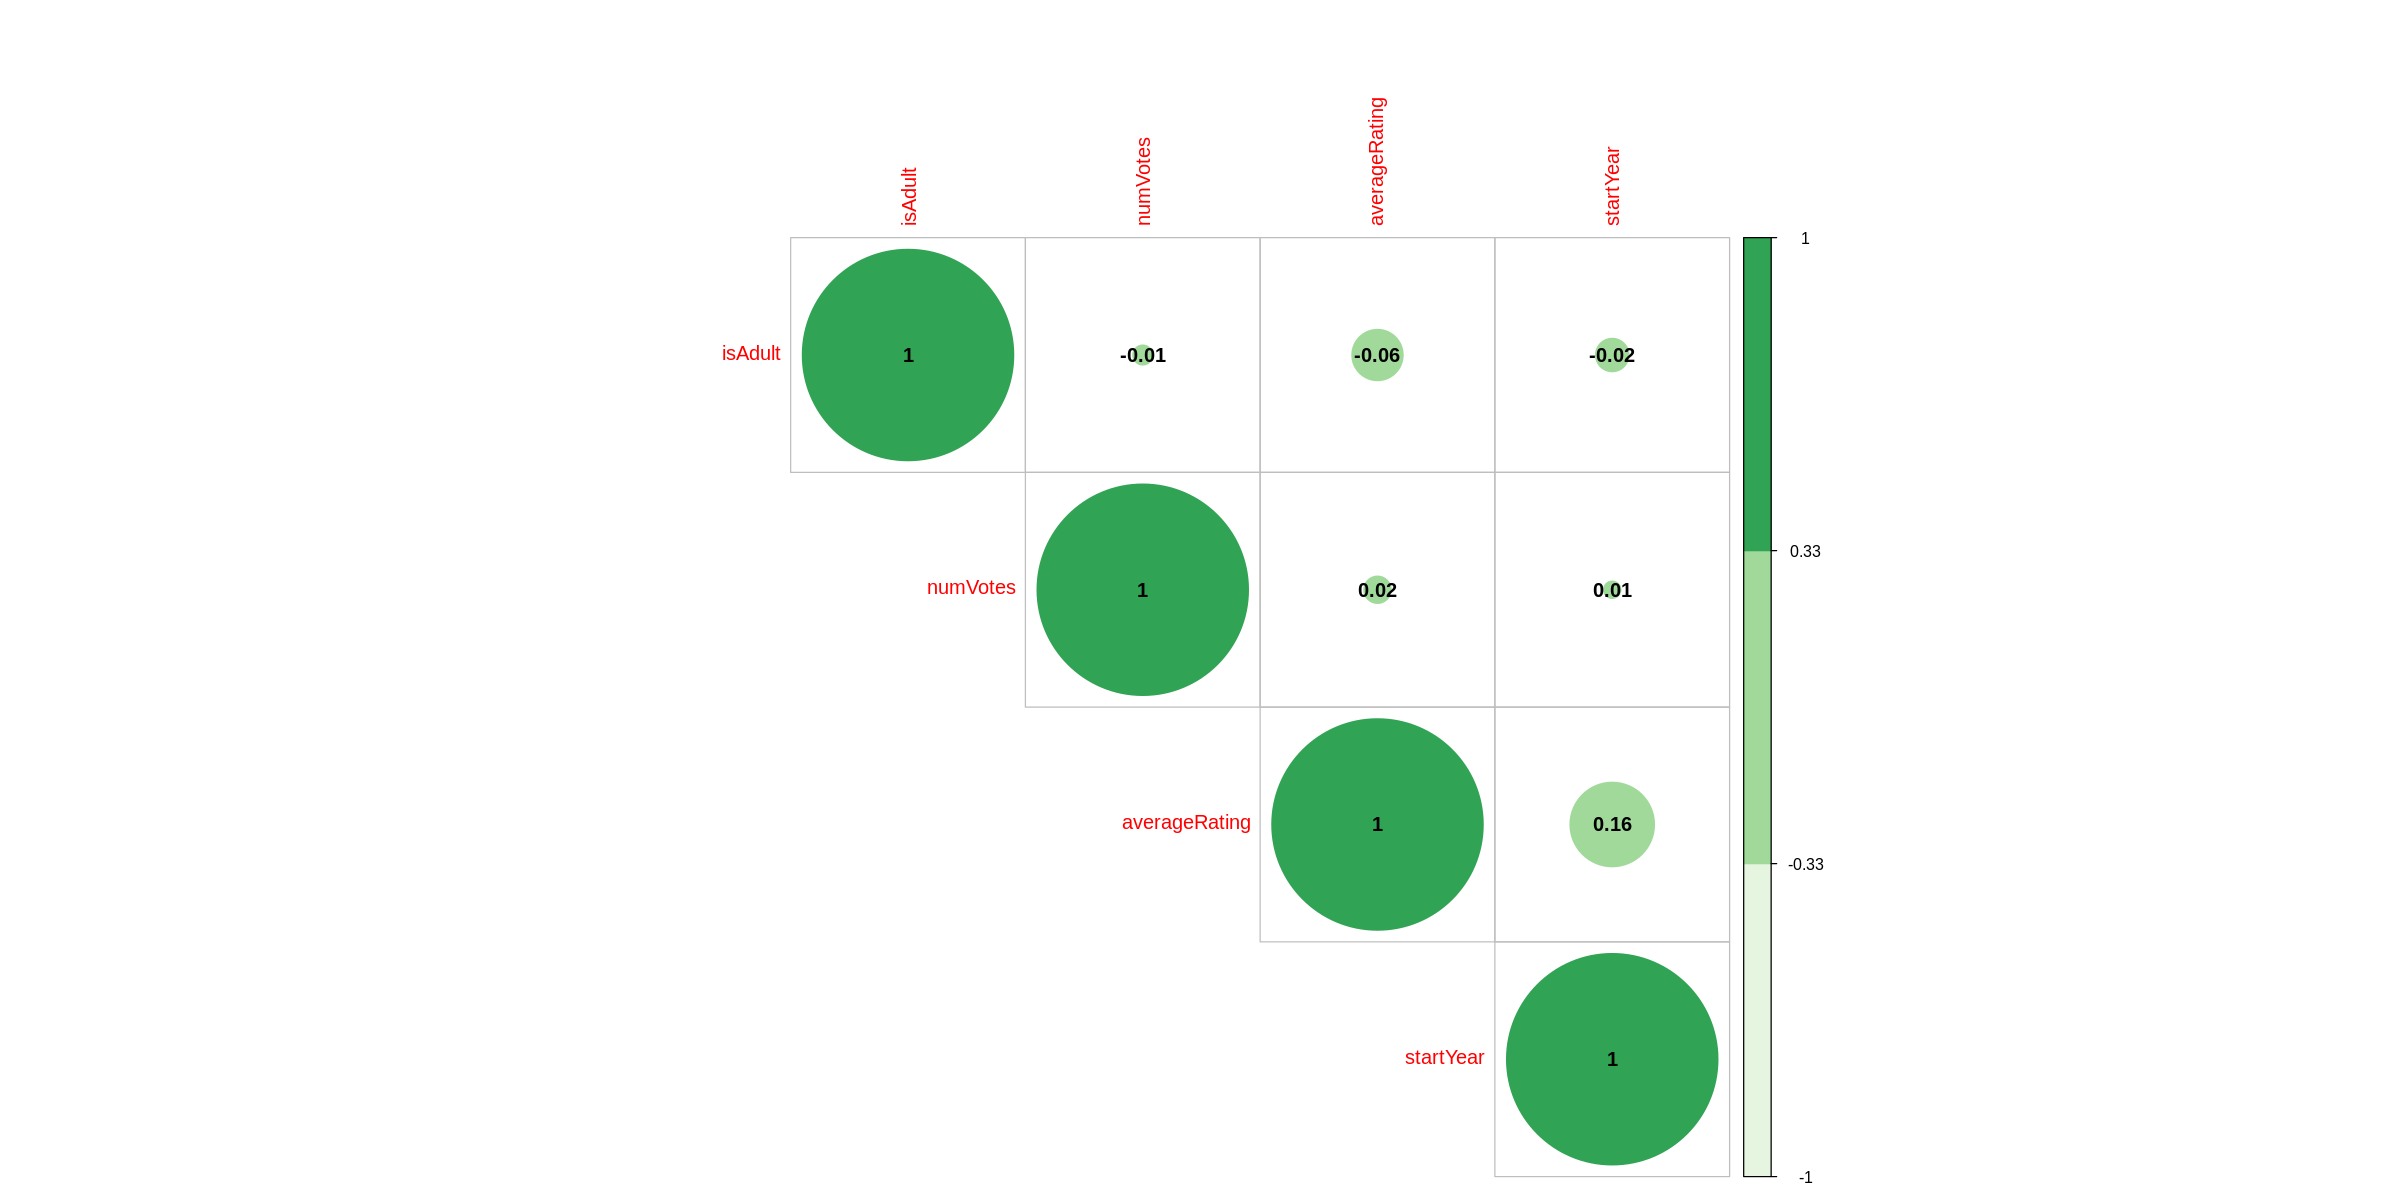

In [101]:
library(Hmisc)
library(corrplot)
library(RColorBrewer)
datos.rcorr = rcorr(as.matrix(datos[,c(1,2,4,5)]))
corrplot(datos.rcorr$r, type = "upper", order = "hclust",
         col = brewer.pal(n = 2, name = "Greens"), addCoef.col = "black", bg = "white")

LIMPIO BASE DE DATOS "RESULTADOS"

In [102]:
#Imputo variables 
table(resultados$titleType)
resultados$titleType[resultados$titleType == ""] <- "movie"


                    movie        short    tvEpisode tvMiniSeries      tvMovie 
           3        77459        36977       143960         3177        13446 
    tvSeries      tvShort    tvSpecial        video    videoGame 
       21571          618         2835        18436         3450 

In [103]:
#Imputo variables 
table(resultados$isAdult)
resultados$isAdult[resultados$isAdult == "2020"] <- "0"
resultados$isAdult[is.na(resultados$isAdult)]<-"0"


     0      1   2014 
315803   6125      1 

In [104]:
#Imputo variables 
table(resultados$startYear)
resultados$startYear[resultados$startYear == ""] <- "\\N"
resultados$startYear<-as.numeric(resultados$startYear)
resultados$startYear[is.na(resultados$startYear)]=median(resultados$startYear,na.rm=TRUE)


        \\N  1877  1878  1883  1887  1888  1890  1891  1892  1893  1894  1895 
    3    51     1     1     1    17     2     1     5     1     2    40    32 
 1896  1897  1898  1899  1900  1901  1902  1903  1904  1905  1906  1907  1908 
  212   267   136   103   104    76    78    86    71    60    93    84    83 
 1909  1910  1911  1912  1913  1914  1915  1916  1917  1918  1919  1920  1921 
  125    97   149   152   144   137   163   141   117   115   109   145   124 
 1922  1923  1924  1925  1926  1927  1928  1929  1930  1931  1932  1933  1934 
  129   144   160   198   210   218   230   286   313   391   397   386   429 
 1935  1936  1937  1938  1939  1940  1941  1942  1943  1944  1945  1946  1947 
  478   476   472   474   449   430   473   447   400   377   351   377   363 
 1948  1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960 
  403   449   532   543   615   720   698   866   880   952  1044  1164  1251 
 1961  1962  1963  1964  1965  1966  1967  1968  19

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [105]:
#Imputo variables
table(resultados$runtimeMinutes)
resultados$runtimeMinutes[resultados$runtimeMinutes == ""] <- "\\N"
resultados$runtimeMinutes=as.numeric(resultados$runtimeMinutes)
resultados$runtimeMinutes[is.na(resultados$runtimeMinutes)]=median(resultados$runtimeMinutes,na.rm=TRUE)


                  \\N          1         10        100        101        102 
         3      84846        980       3026       2823        997       1099 
       103        104       1040        105        106        107        108 
       910        935          2       1502        720        732        751 
      1080        109         11        110       1100        111        112 
         2        534       2664       1243          1        453        536 
       113        114       1140        115        116        117        118 
       467        438          1        628        395        367        473 
       119         12        120       1200        121        122        123 
       370       2219       2105          1        278        267        285 
      1234        124       1248        125        126        127        128 
         1        269          1        383        257        256        245 
       129       1290         13        130        131        1

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [106]:
#Eliminamos columnas 
resultados$endYear=NULL
resultados$ordering=NULL
resultados$lenguage=NULL
resultados$types=NULL
resultados$attributes=NULL
resultados$isOriginalTitle=NULL
resultados$adult=NULL
resultados$budget=NULL
resultados$genres_y=NULL
resultados$original_language=NULL
resultados$overview=NULL
resultados$popularity=NULL
resultados$production_companies=NULL
resultados$production_countries=NULL
resultados$release_date=NULL
resultados$revenue=NULL
resultados$runtime=NULL
resultados$status=NULL
resultados$tagline=NULL
resultados$video=NULL


In [107]:
#Regresion lineal
regresion <- lm(averageRating ~ log(numVotes) + titleType + runtimeMinutes + startYear, data = datos)
summary(regresion)


Call:
lm(formula = averageRating ~ log(numVotes) + titleType + runtimeMinutes + 
    startYear, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6695 -0.6745  0.1374  0.8345  3.9858 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.264e+00  1.286e-01  -33.16   <2e-16 ***
log(numVotes)          4.761e-02  7.871e-04   60.48   <2e-16 ***
titleTypeshort         7.464e-01  5.280e-03  141.37   <2e-16 ***
titleTypetvEpisode     1.281e+00  3.825e-03  335.03   <2e-16 ***
titleTypetvMiniSeries  9.344e-01  1.394e-02   67.02   <2e-16 ***
titleTypetvMovie       5.070e-01  7.359e-03   68.89   <2e-16 ***
titleTypetvSeries      6.606e-01  6.135e-03  107.67   <2e-16 ***
titleTypetvShort       7.725e-01  3.143e-02   24.58   <2e-16 ***
titleTypetvSpecial     6.386e-01  1.472e-02   43.39   <2e-16 ***
titleTypevideo         4.658e-01  6.596e-03   70.62   <2e-16 ***
titleTypevideoGame     8.841e-01  1.338e-02   66.09   <2e-16 ***


Warning message in abline(regresion):
“only using the first two of 13 regression coefficients”


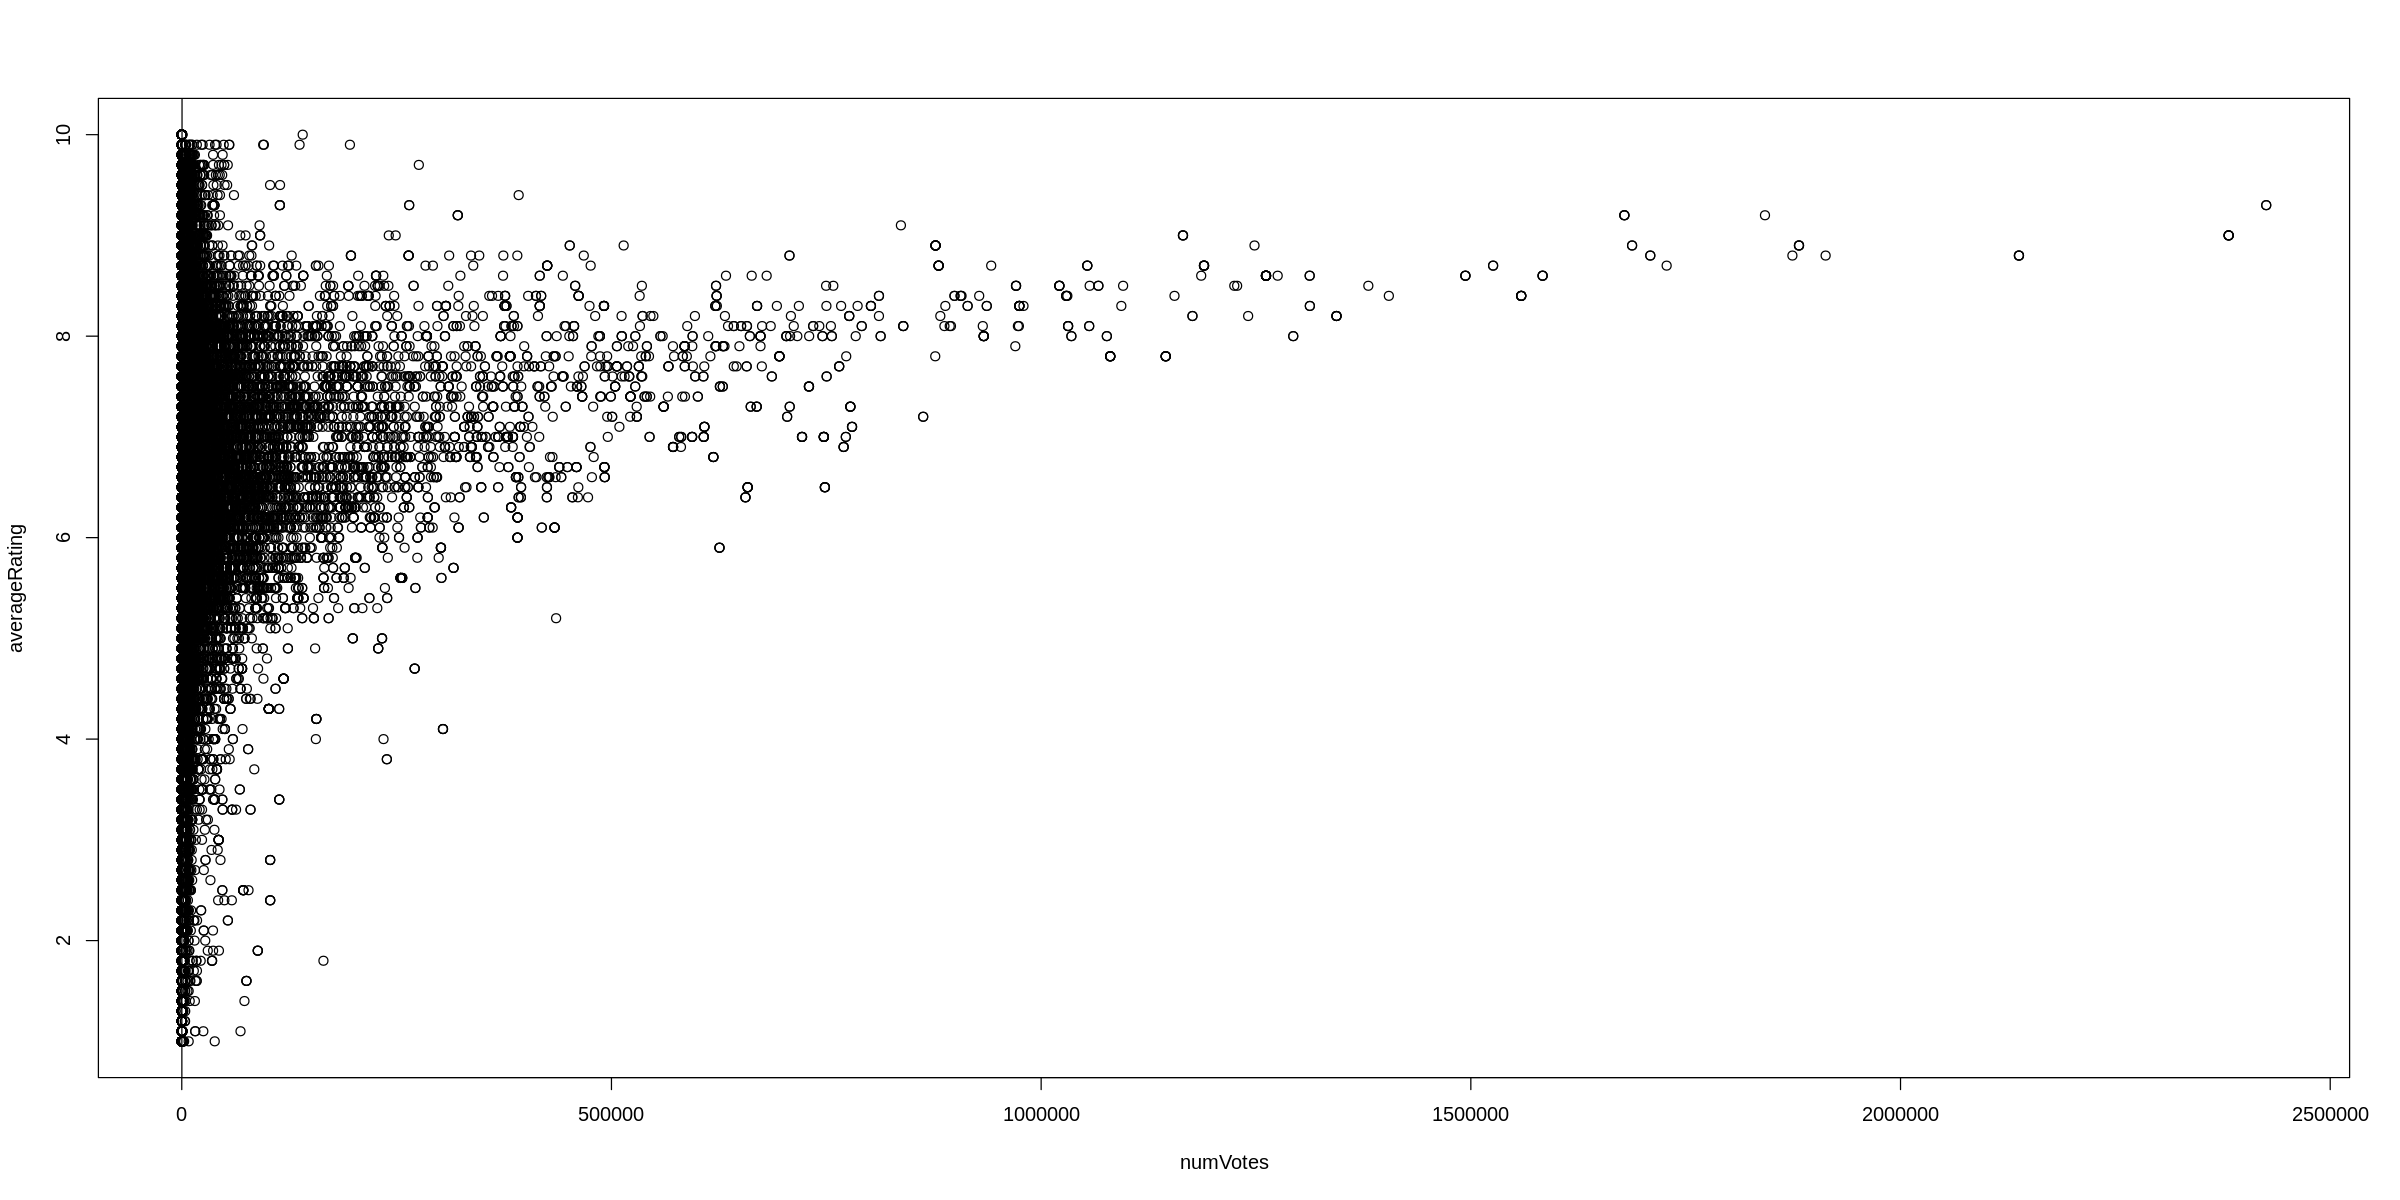

In [108]:
#Representación regresión lineal
plot(datos$numVotes, datos$averageRating, xlab='numVotes', ylab='averageRating')
abline(regresion)

In [109]:
install.packages("ggplot2")

install.packages("readxl")

install.packages("viridis") 

install.packages("tidyverse")

install.packages("fmsb") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [110]:
library("ggplot2")

library("readxl")

library("tidyverse")

library("viridis")

library("fmsb")

library("rpart")

ÁRBOL DE DECISIÓN

In [111]:
set.seed(222);particion=createDataPartition(y=datos$averageRating,p=0.3,list=FALSE)
entrenar=datos[particion,]
test=datos[-particion,]

In [117]:
library(rpart)
arbol=rpart(averageRating~.,entrenar)
pred=predict(arbol,test)
ECMA=mean((pred-test$averageRating)^2)

In [ ]:
library(rpart.plot)
rpart.plot(arbol)

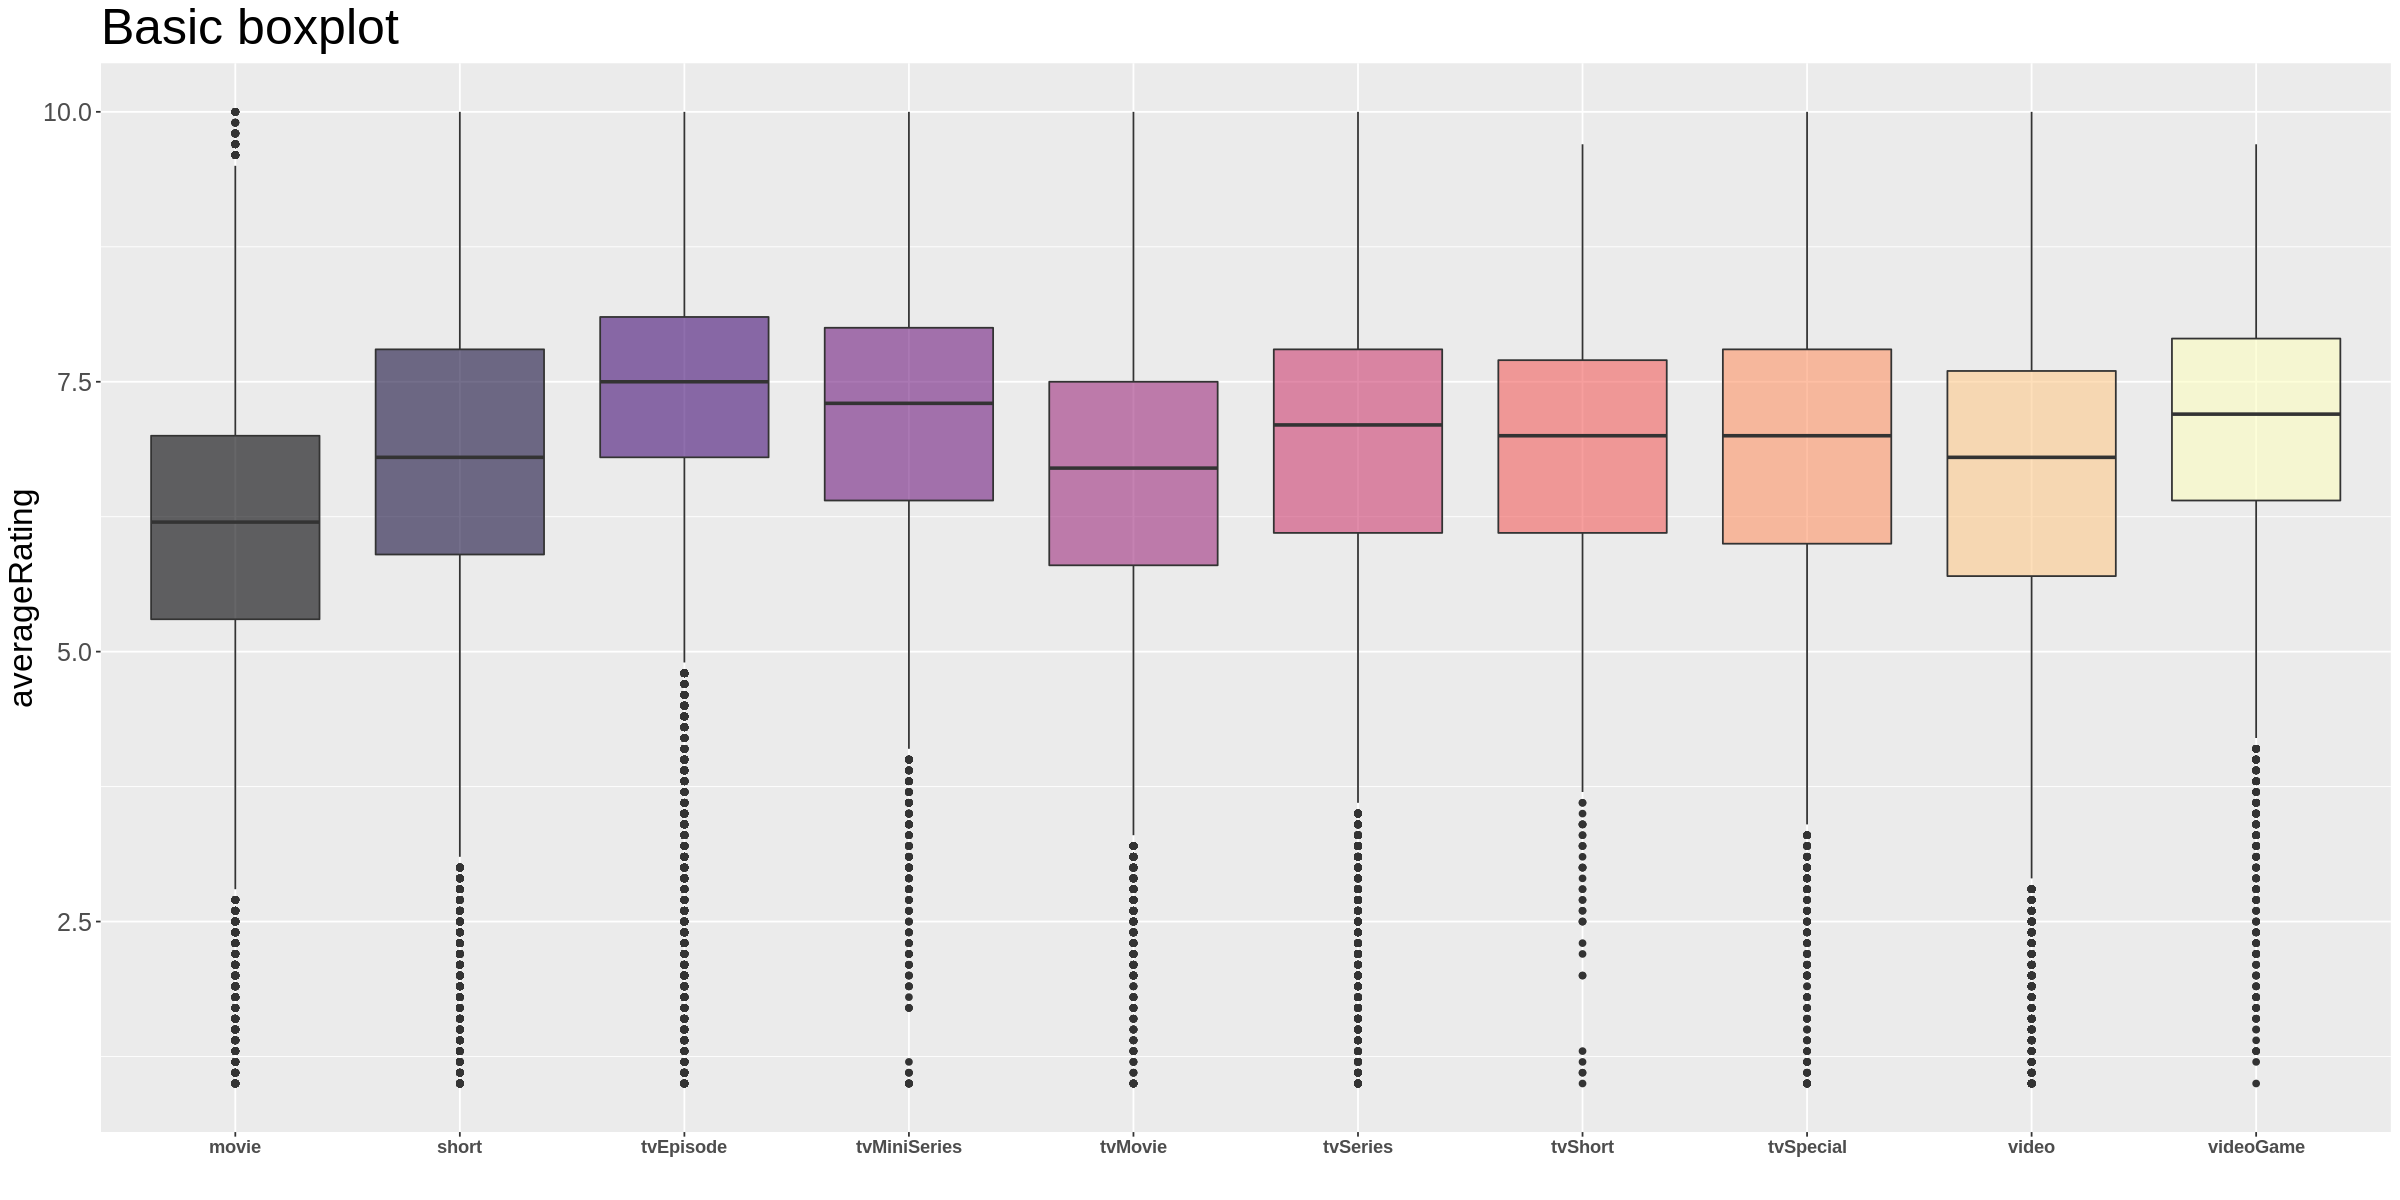

In [112]:
#Grafico 1

 options(repr.plot.width = 20, repr.plot.height = 10)

 
 ggplot(data= datos, aes(x=titleType, y=averageRating, fill=titleType)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Basic boxplot") +
    xlab("")+
    theme(axis.text.y = element_text(size = 15)) +
    theme(axis.text.x = element_text(face = "bold",size = 11)) +
    theme(plot.title = element_text(size = 30), plot.subtitle = element_text(size = 20),
    axis.title = element_text(size = 20))


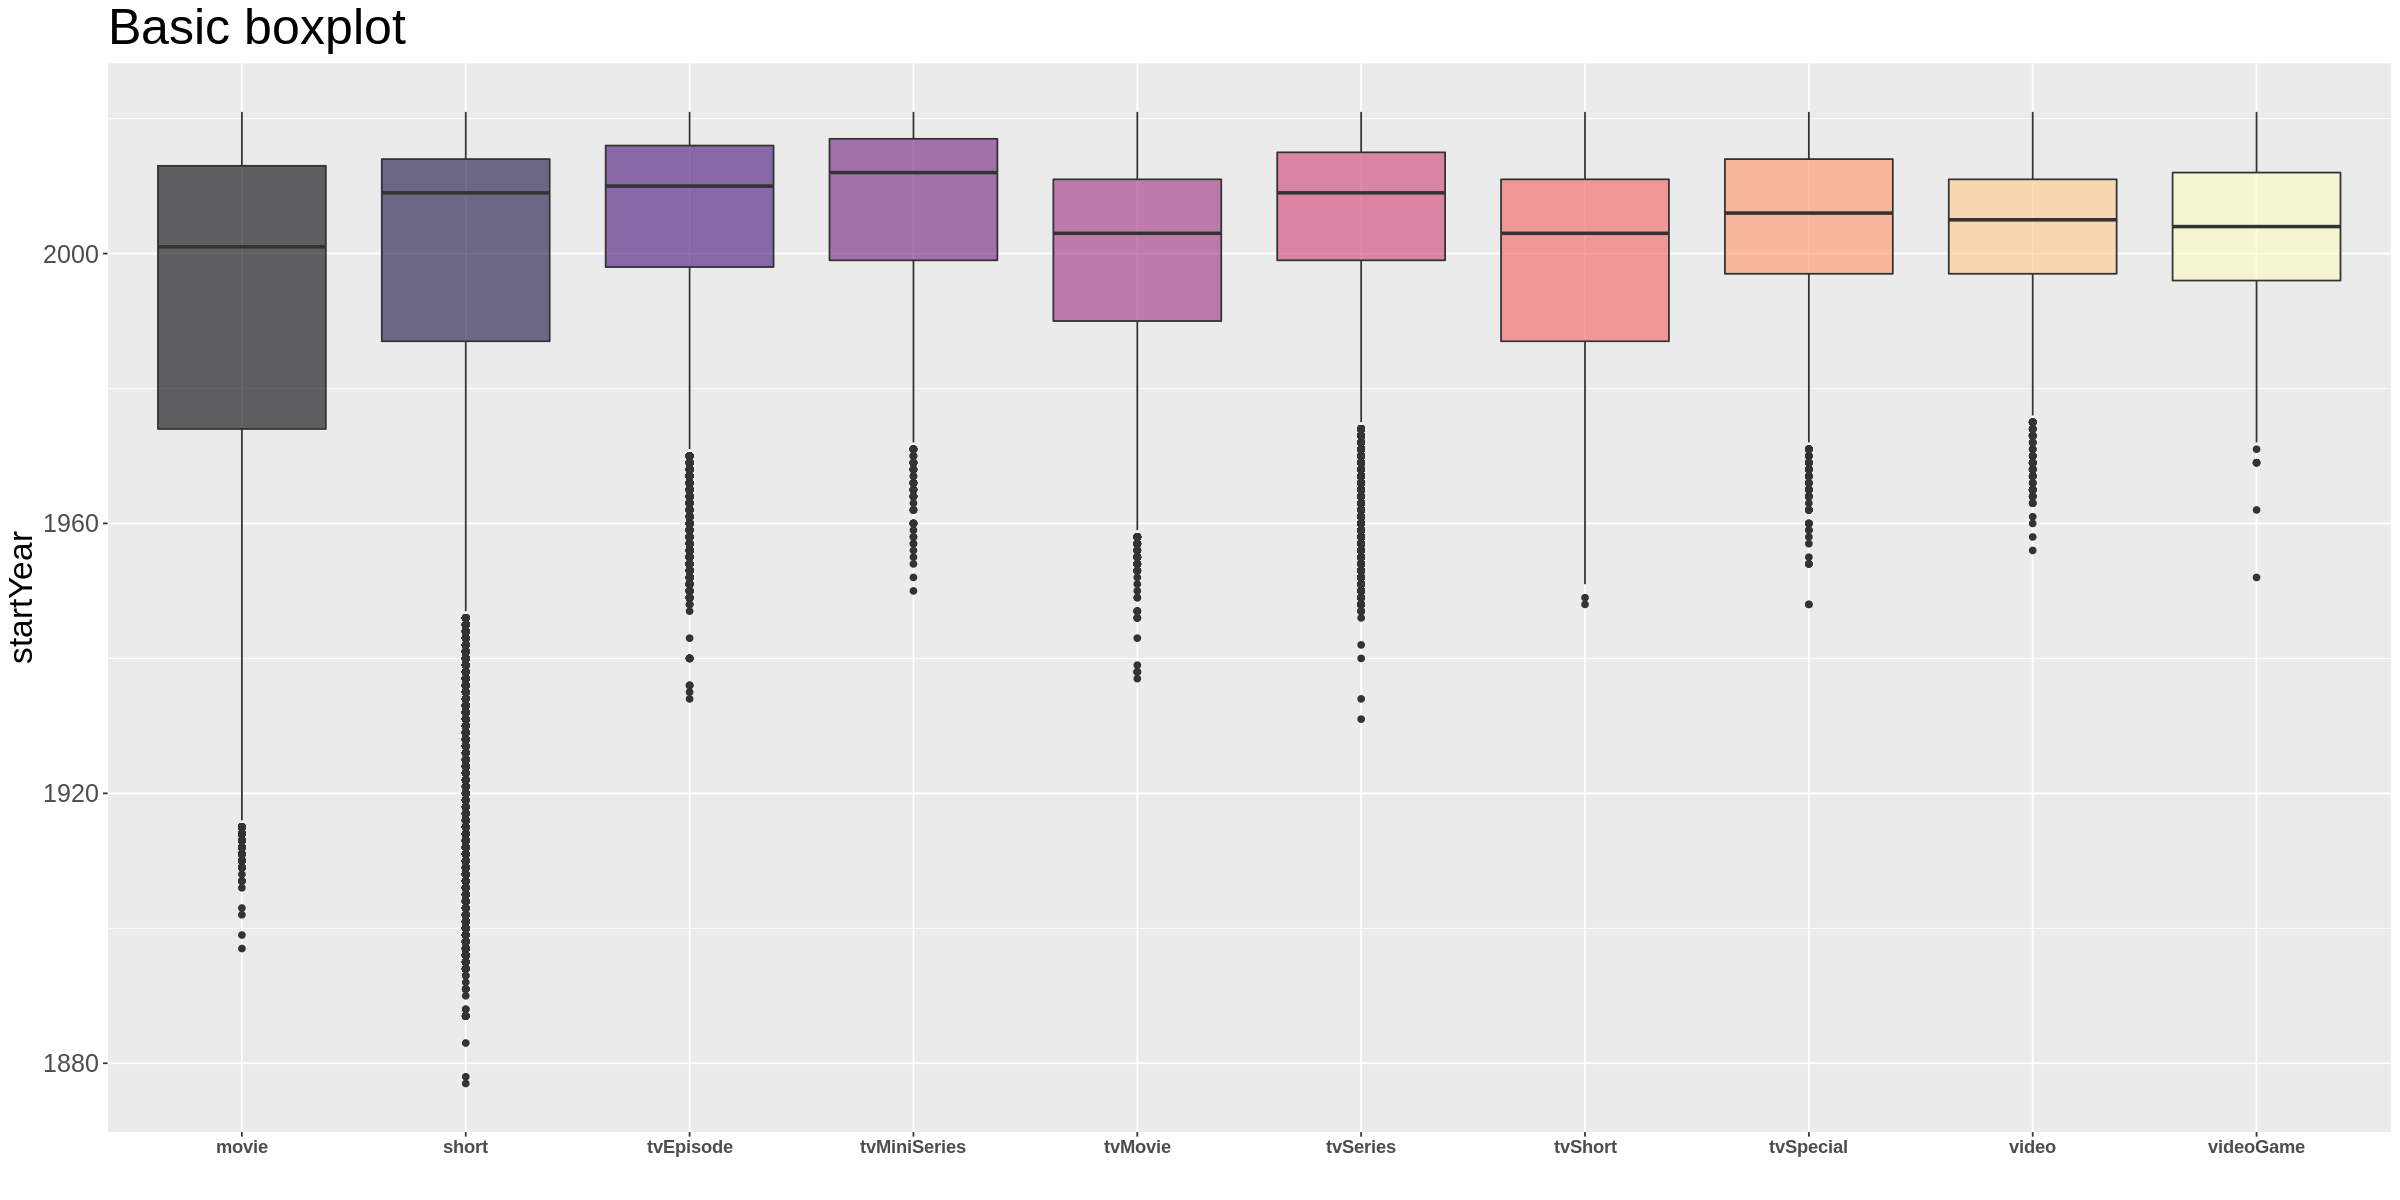

In [113]:
#Grafico 2

 options(repr.plot.width = 20, repr.plot.height = 10)

 
 ggplot(data= resultados, aes(x=titleType, y=startYear, fill=titleType)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Basic boxplot") +
    xlab("")+
    theme(axis.text.y = element_text(size = 15)) +
    theme(axis.text.x = element_text(face = "bold",size = 11)) +
    theme(plot.title = element_text(size = 30), plot.subtitle = element_text(size = 20),
    axis.title = element_text(size = 20))


In [114]:
resultados = read.csv("resultados.csv", header=TRUE, sep=",")

In [116]:
tp2 <- data.frame(predict(arbol, resultados))

ERROR: ignored

In [ ]:
names(final)[1] = "averageRating"
tp2$'id'<- resultados$id

In [ ]:
write.csv(tp2, file = "AP-CandelaPalomeque.csv", row.names = F)